In [52]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
import seaborn as sb
import csv
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [53]:
data = pd.read_csv('data/Aviation_data.csv', encoding = 'ISO-8859-1', low_memory = False)

In [54]:
print(data.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [55]:
data = data[['Investigation.Type','Aircraft.damage','Aircraft.Category',
            'Number.of.Engines','Engine.Type','Purpose.of.flight',
            'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',
            'Total.Uninjured','Weather.Condition','Broad.phase.of.flight','Event.Date']]

In [56]:
data.head()

,Investigation.Type,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Date
0,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948-10-24
1,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962-07-19
2,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974-08-30
3,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977-06-19
4,Accident,Destroyed,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979-08-02


In [57]:
data.dtypes

Investigation.Type         object
Aircraft.damage            object
Aircraft.Category          object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Event.Date                 object
dtype: object

In [58]:
data.shape

(90348, 13)

# Data Cleaning

# Missing Values
for label variable,delete the rows with unknown value

In [59]:
data[data['Total.Fatal.Injuries']==0]

,Investigation.Type,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Date
7,Accident,Substantial,Airplane,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,1982-01-01
8,Accident,Substantial,Airplane,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,1982-01-01
9,Accident,Substantial,NaN,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,1982-01-01
10,Accident,Substantial,NaN,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,1982-01-01
11,Accident,Substantial,NaN,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,1982-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,NaN,NaN,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,2022-12-26
90344,Accident,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,2022-12-26
90345,Accident,Substantial,Airplane,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,2022-12-26
90346,Accident,NaN,NaN,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,2022-12-26


In [60]:
data = data[data['Total.Fatal.Injuries'].notna()]
data

,Investigation.Type,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Date
0,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948-10-24
1,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962-07-19
2,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974-08-30
3,Accident,Destroyed,NaN,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977-06-19
4,Accident,Destroyed,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,NaN,NaN,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,2022-12-26
90344,Accident,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,2022-12-26
90345,Accident,Substantial,Airplane,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,2022-12-26
90346,Accident,NaN,NaN,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,2022-12-26


For numerical variables as predicators, replace missing values by mean

In [61]:
def check_null_values(data):
    print('===Number of Missing Values for each Column===')
    for col in data.columns:
        print(col, '=', data[col].isnull().sum())
        
check_null_values(data)

===Number of Missing Values for each Column===
Investigation.Type = 0
Aircraft.damage = 2703
Aircraft.Category = 48912
Number.of.Engines = 5296
Engine.Type = 6204
Purpose.of.flight = 4916
Total.Fatal.Injuries = 0
Total.Serious.Injuries = 2658
Total.Minor.Injuries = 2961
Total.Uninjured = 2999
Weather.Condition = 4181
Broad.phase.of.flight = 26430
Event.Date = 0


In [62]:
data['Total.Uninjured'].fillna(data['Total.Uninjured'].mean(), inplace=True)
data['Total.Minor.Injuries'].fillna(data['Total.Minor.Injuries'].mean(), inplace=True)
data['Total.Serious.Injuries'].fillna(data['Total.Serious.Injuries'].mean(), inplace=True)
data['Number.of.Engines'].fillna(data['Number.of.Engines'].mean(), inplace=True)

In [63]:
data['Aircraft.Category'].fillna('Unknown',inplace=True)

data['Engine.Type'].fillna('Others',inplace=True)
data['Engine.Type'].replace(['None','Unknown'],'Others')

data['Purpose.of.flight'].fillna('Unknown',inplace=True)
data['Weather.Condition'].fillna('UNK',inplace=True)
data['Broad.phase.of.flight'].fillna('UNKNOWN',inplace=True)

In [64]:
print(data.head())

  Investigation.Type Aircraft.damage Aircraft.Category  Number.of.Engines  \
0           Accident       Destroyed           Unknown           1.000000   
1           Accident       Destroyed           Unknown           1.000000   
2           Accident       Destroyed           Unknown           1.000000   
3           Accident       Destroyed           Unknown           1.000000   
4           Accident       Destroyed           Unknown           1.148604   

     Engine.Type Purpose.of.flight  Total.Fatal.Injuries  \
0  Reciprocating          Personal                   2.0   
1  Reciprocating          Personal                   4.0   
2  Reciprocating          Personal                   3.0   
3  Reciprocating          Personal                   2.0   
4         Others          Personal                   1.0   

   Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured  \
0                0.000000              0.000000         0.000000   
1                0.000000              0

In [65]:
data

,Investigation.Type,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Date
0,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,UNK,Cruise,1948-10-24
1,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,4.0,0.000000,0.000000,0.000000,UNK,Unknown,1962-07-19
2,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,3.0,0.258132,0.305191,4.805877,IMC,Cruise,1974-08-30
3,Accident,Destroyed,Unknown,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.000000,IMC,Cruise,1977-06-19
4,Accident,Destroyed,Unknown,1.148604,Others,Personal,1.0,2.000000,0.305191,0.000000,VMC,Approach,1979-08-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,Accident,NaN,Unknown,1.148604,Others,Personal,0.0,1.000000,0.000000,0.000000,UNK,UNKNOWN,2022-12-26
90344,Accident,NaN,Unknown,1.148604,Others,Unknown,0.0,0.000000,0.000000,0.000000,UNK,UNKNOWN,2022-12-26
90345,Accident,Substantial,Airplane,1.000000,Others,Personal,0.0,0.000000,0.000000,1.000000,VMC,UNKNOWN,2022-12-26
90346,Accident,NaN,Unknown,1.148604,Others,Personal,0.0,0.000000,0.000000,0.000000,UNK,UNKNOWN,2022-12-26


In [66]:
check_null_values(data)

===Number of Missing Values for each Column===
Investigation.Type = 0
Aircraft.damage = 2703
Aircraft.Category = 0
Number.of.Engines = 0
Engine.Type = 0
Purpose.of.flight = 0
Total.Fatal.Injuries = 0
Total.Serious.Injuries = 0
Total.Minor.Injuries = 0
Total.Uninjured = 0
Weather.Condition = 0
Broad.phase.of.flight = 0
Event.Date = 0


# Explore Analysis

In [67]:
data['Total.Fatal.Injuries'].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

<Axes: xlabel='Total.Fatal.Injuries'>

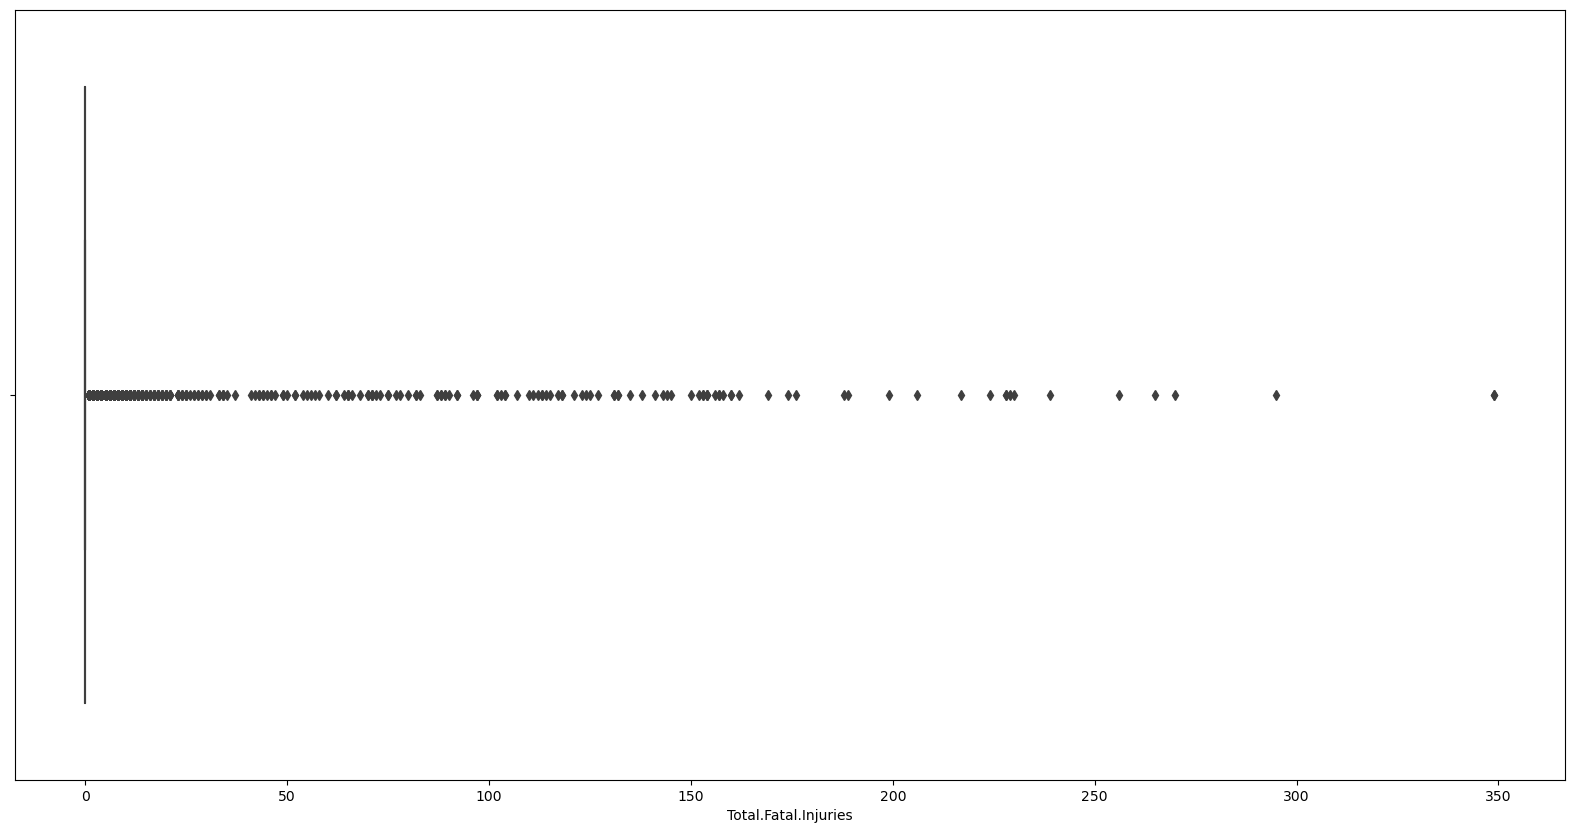

In [68]:
f,axes = plt.subplots(1, 1, figsize=(20,10))
sb.boxplot(x=data['Total.Fatal.Injuries'], ax=axes)

<Axes: xlabel='Total.Serious.Injuries'>

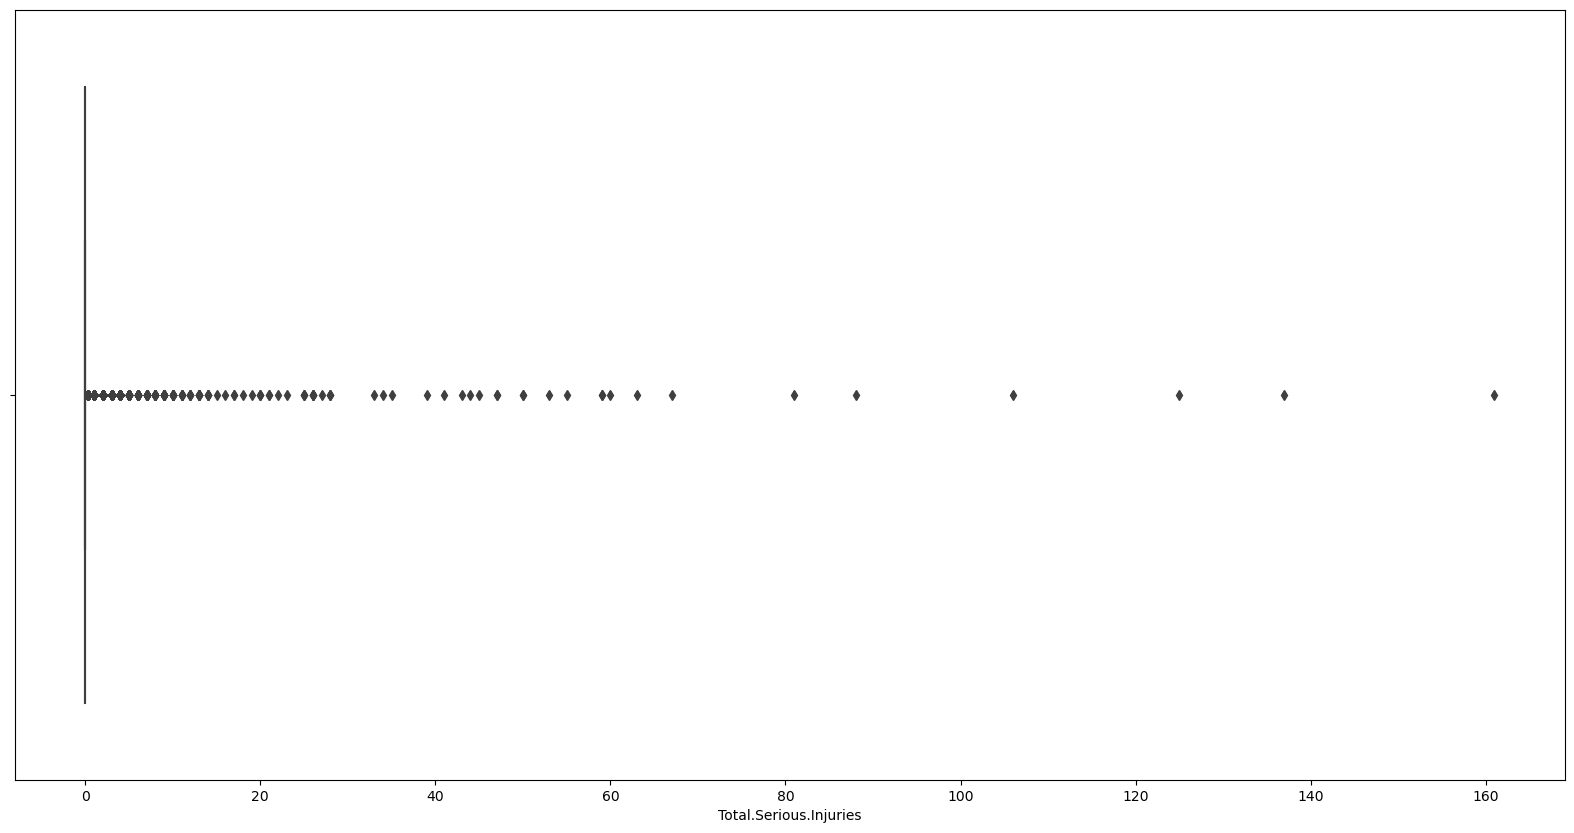

In [69]:
f,axes = plt.subplots(1, 1, figsize=(20,10))
sb.boxplot(x=data['Total.Serious.Injuries'], ax=axes)

<Axes: xlabel='Total.Minor.Injuries'>

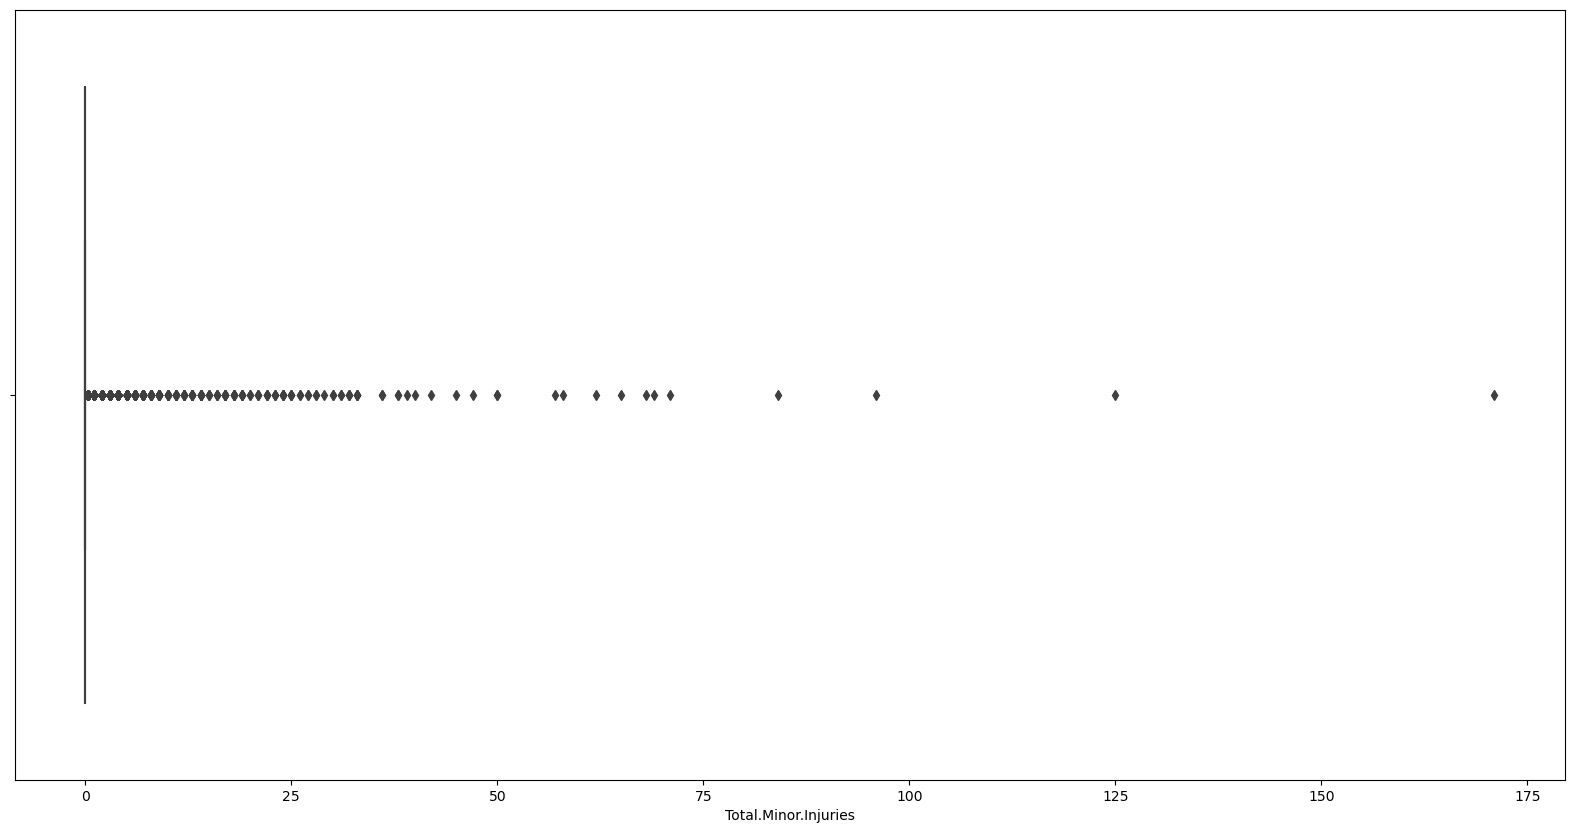

In [70]:
f,axes = plt.subplots(1, 1, figsize=(20,10))
sb.boxplot(x=data['Total.Minor.Injuries'], ax=axes)

In [71]:
data['ratio'] = data['Total.Fatal.Injuries']/(data['Total.Uninjured']+
                                             data['Total.Serious.Injuries']+
                                             data['Total.Minor.Injuries']+
                                             data['Total.Fatal.Injuries'])

In [72]:
data[data['ratio'].isnull()]

,Investigation.Type,Aircraft.damage,Aircraft.Category,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Date,ratio
11247,Accident,Substantial,Unknown,2.000000,Reciprocating,Unknown,0.0,0.0,0.0,0.0,VMC,Landing,1985-04-02,NaN
16047,Incident,Minor,Unknown,3.000000,Turbo Fan,Unknown,0.0,0.0,0.0,0.0,UNK,Standing,1986-10-05,NaN
36222,Accident,Substantial,Unknown,1.148604,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1994-10-13,NaN
40635,Accident,Destroyed,Unknown,1.148604,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,1996-09-25,NaN
41320,Incident,Minor,Unknown,1.148604,Unknown,Unknown,0.0,0.0,0.0,0.0,UNK,Standing,1997-03-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90330,Accident,NaN,Unknown,1.148604,Others,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,2022-12-13,NaN
90333,Accident,NaN,Unknown,1.148604,Others,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,2022-12-15,NaN
90338,Accident,NaN,Unknown,1.148604,Others,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,2022-12-18,NaN
90344,Accident,NaN,Unknown,1.148604,Others,Unknown,0.0,0.0,0.0,0.0,UNK,UNKNOWN,2022-12-26,NaN


In [73]:
data = data[data['ratio'].notna()]

In [74]:
data['ratio'].describe()

count    76405.000000
mean         0.185010
std          0.369165
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ratio, dtype: float64

<Axes: xlabel='ratio'>

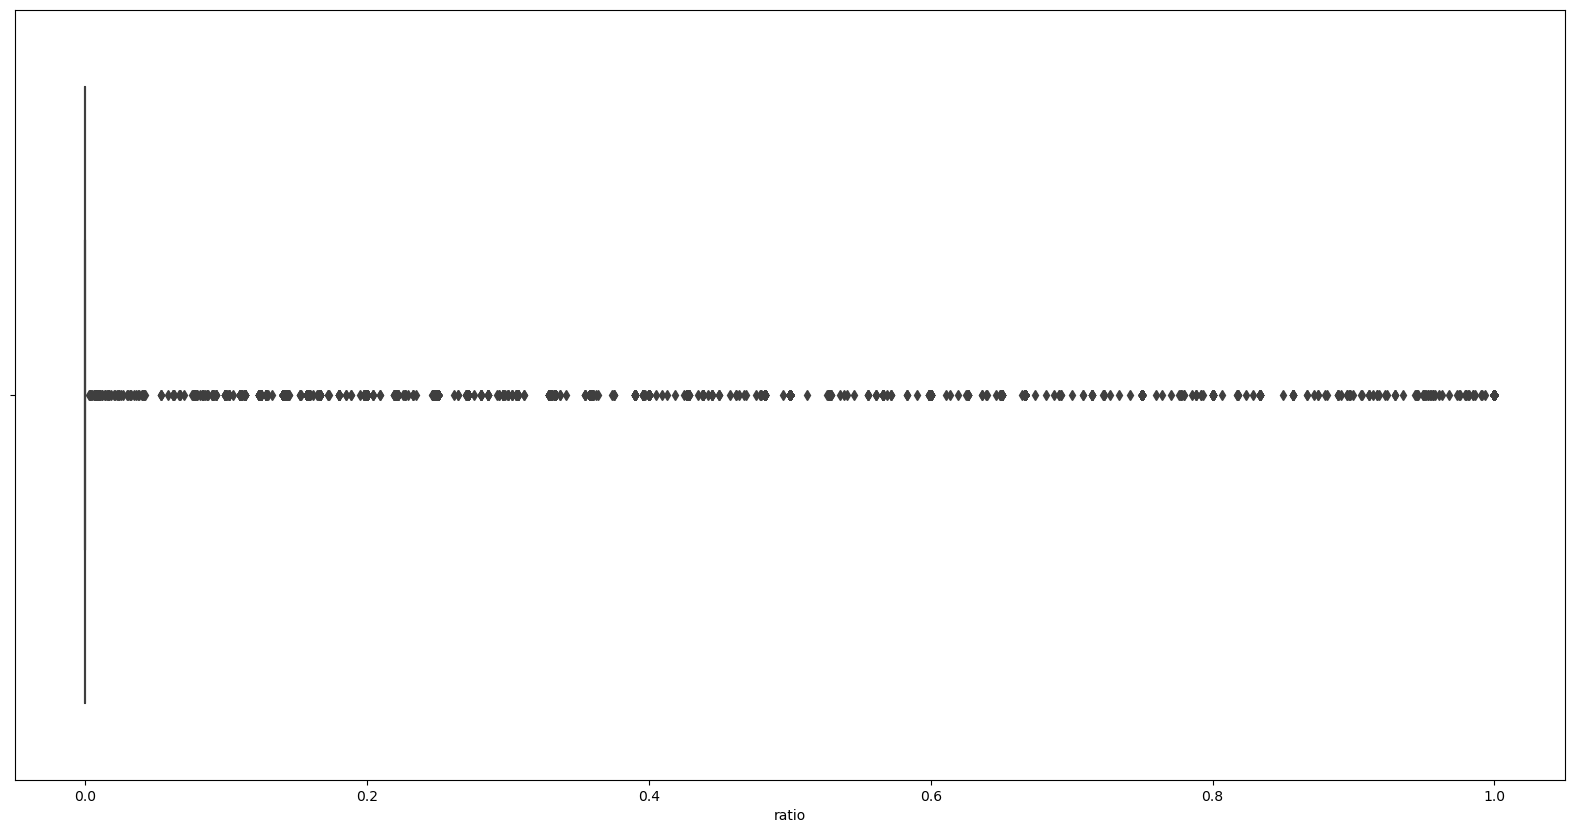

In [75]:
f,axes = plt.subplots(1,1,figsize=(20,10))
sb.boxplot(x=data['ratio'], ax=axes)

<Axes: xlabel='Total.Uninjured'>

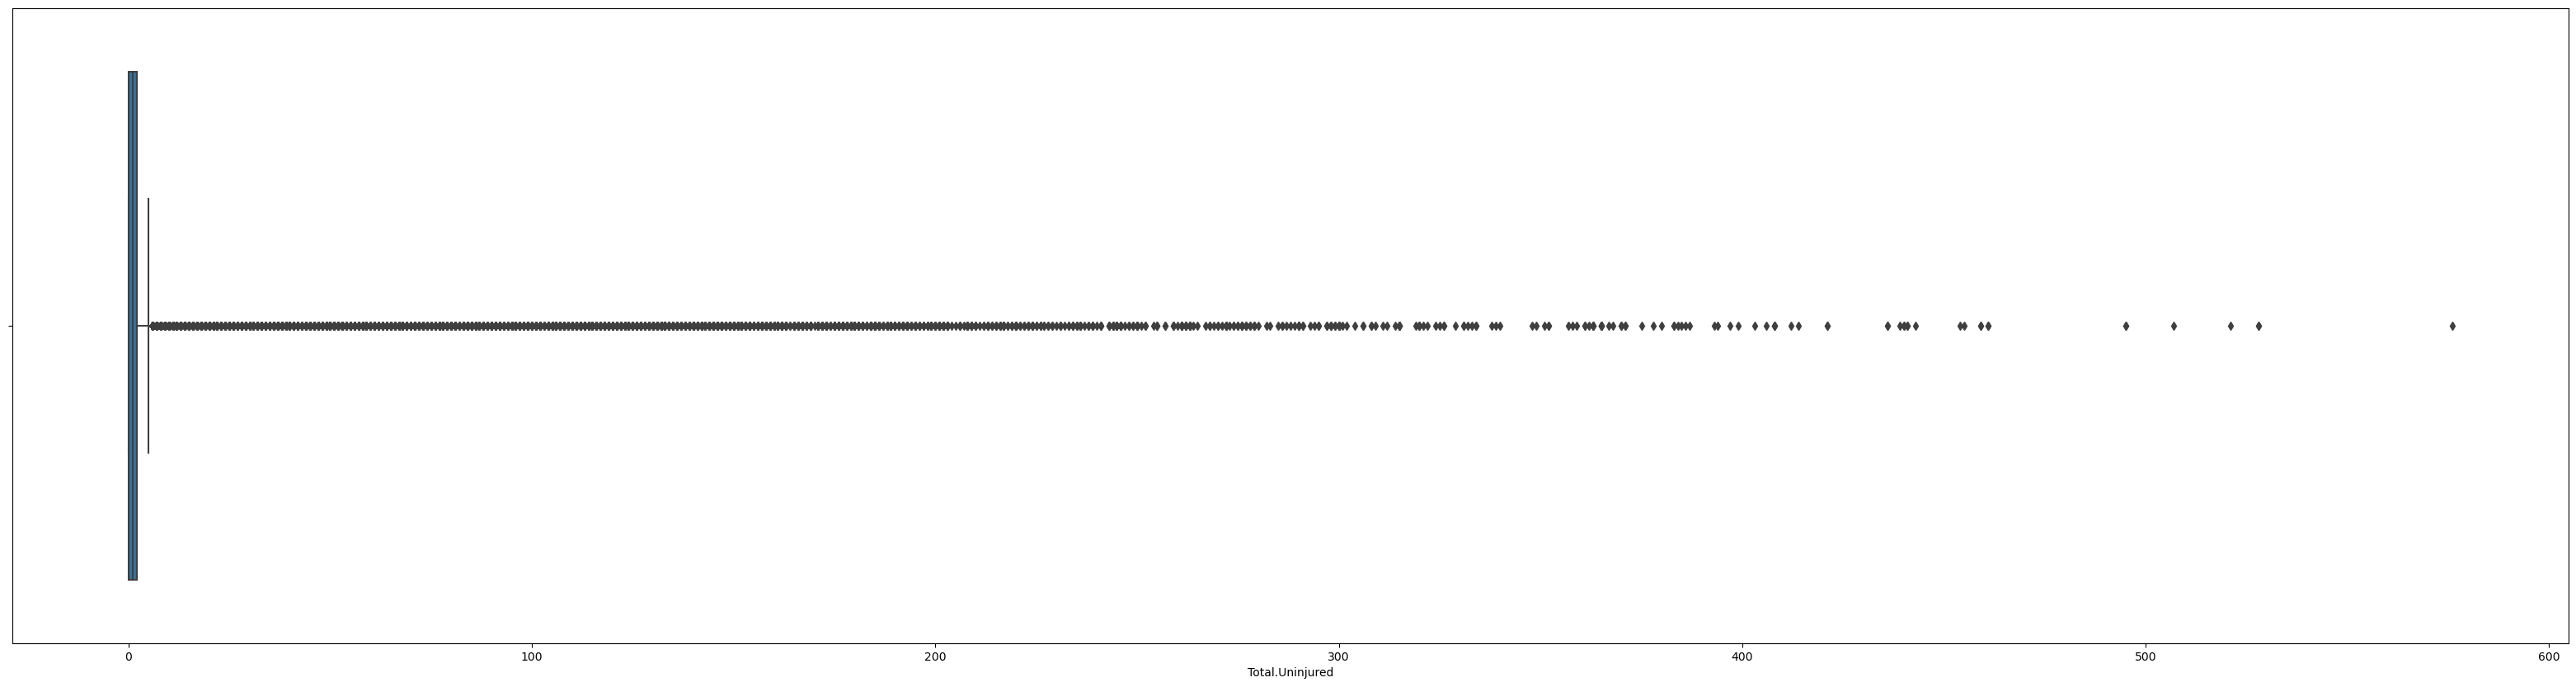

In [76]:
f,axes = plt.subplots(1,1,figsize=(40,10))
sb.boxplot(x=data['Total.Uninjured'], ax=axes)

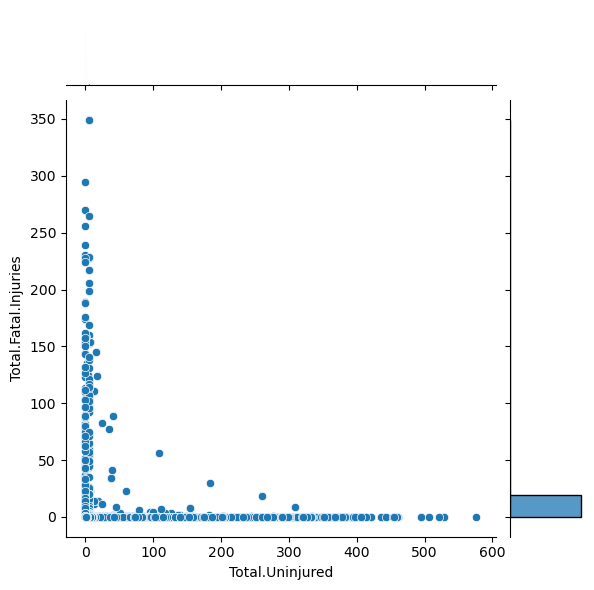

In [77]:
sb.jointplot(x='Total.Uninjured',y='Total.Fatal.Injuries',data=data)

In [78]:
data['Total.Serious.Injuries'].describe()

count    76405.000000
mean         0.261791
std          1.532695
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        161.000000
Name: Total.Serious.Injuries, dtype: float64

<Axes: xlabel='Total.Serious.Injuries'>

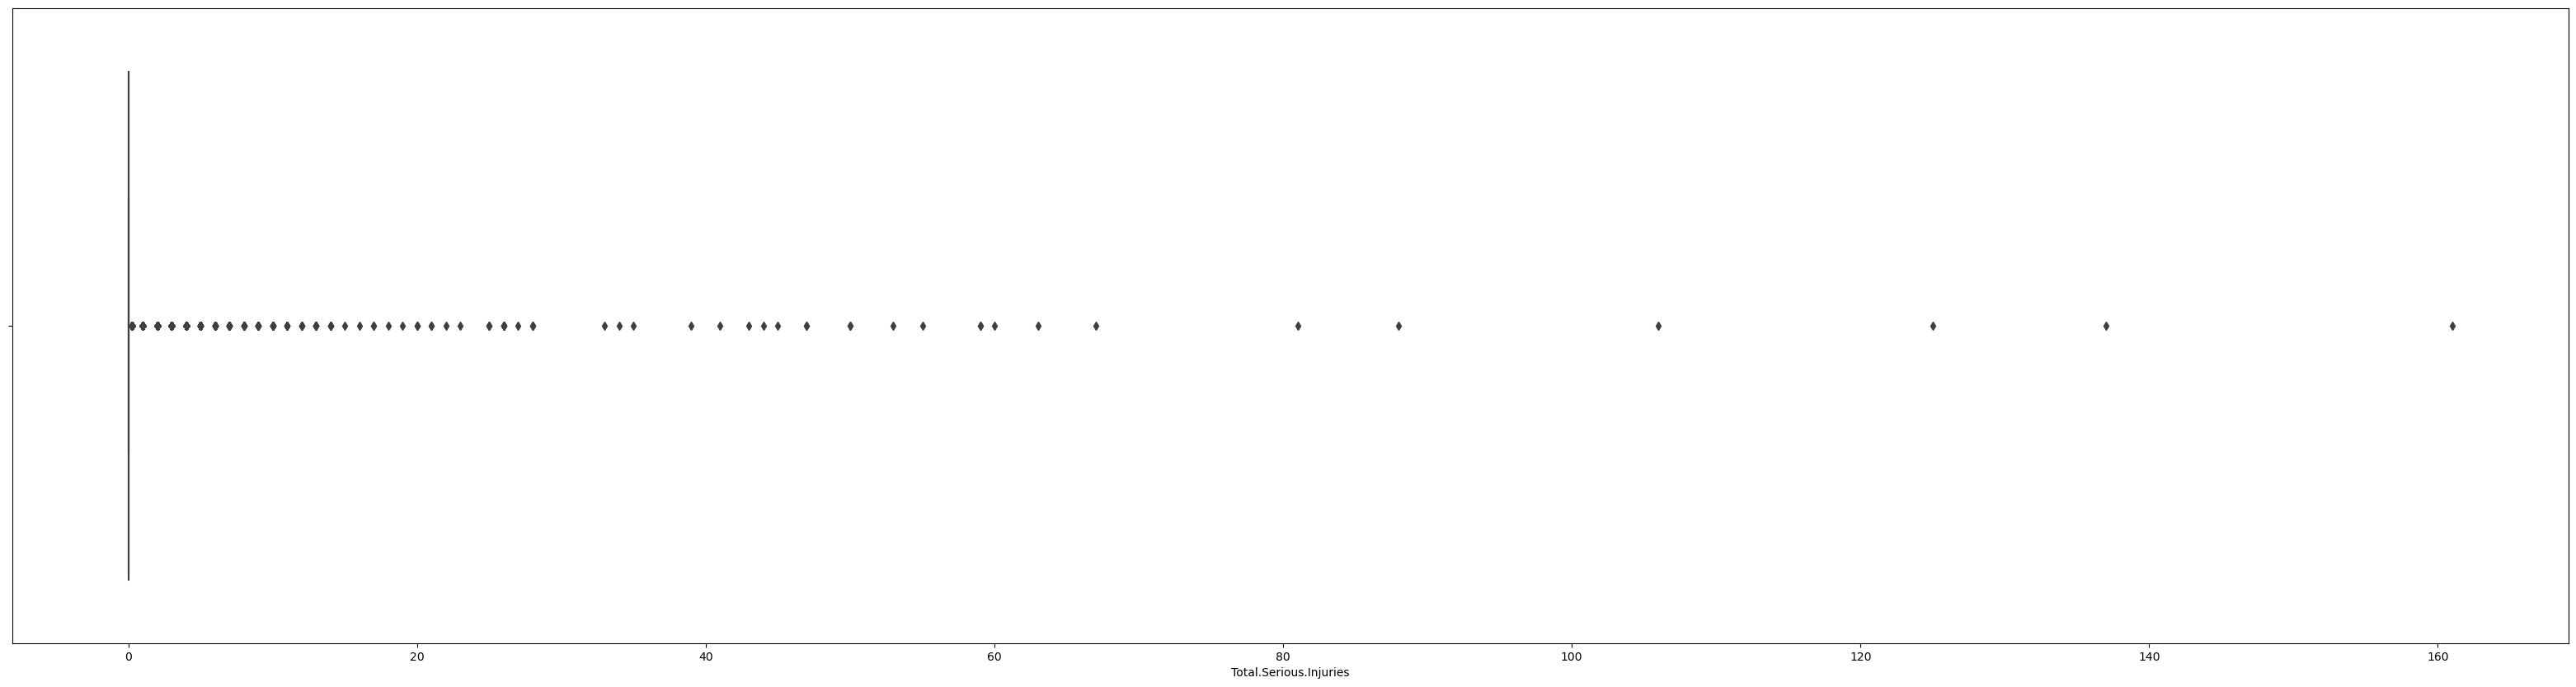

In [79]:
f,axes = plt.subplots(1,1,figsize=(40,10))
sb.boxplot(x='Total.Serious.Injuries',data=data, ax=axes)

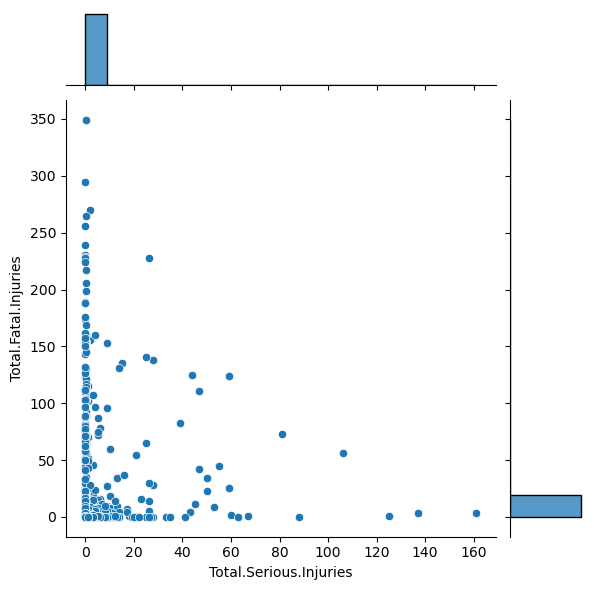

In [80]:
sb.jointplot(x='Total.Serious.Injuries',y='Total.Fatal.Injuries',data=data)

In [81]:
data['Total.Minor.Injuries'].describe()

count    76405.000000
mean         0.309517
std          1.556087
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        171.000000
Name: Total.Minor.Injuries, dtype: float64

 Minor Injuries

<Axes: xlabel='Total.Minor.Injuries'>

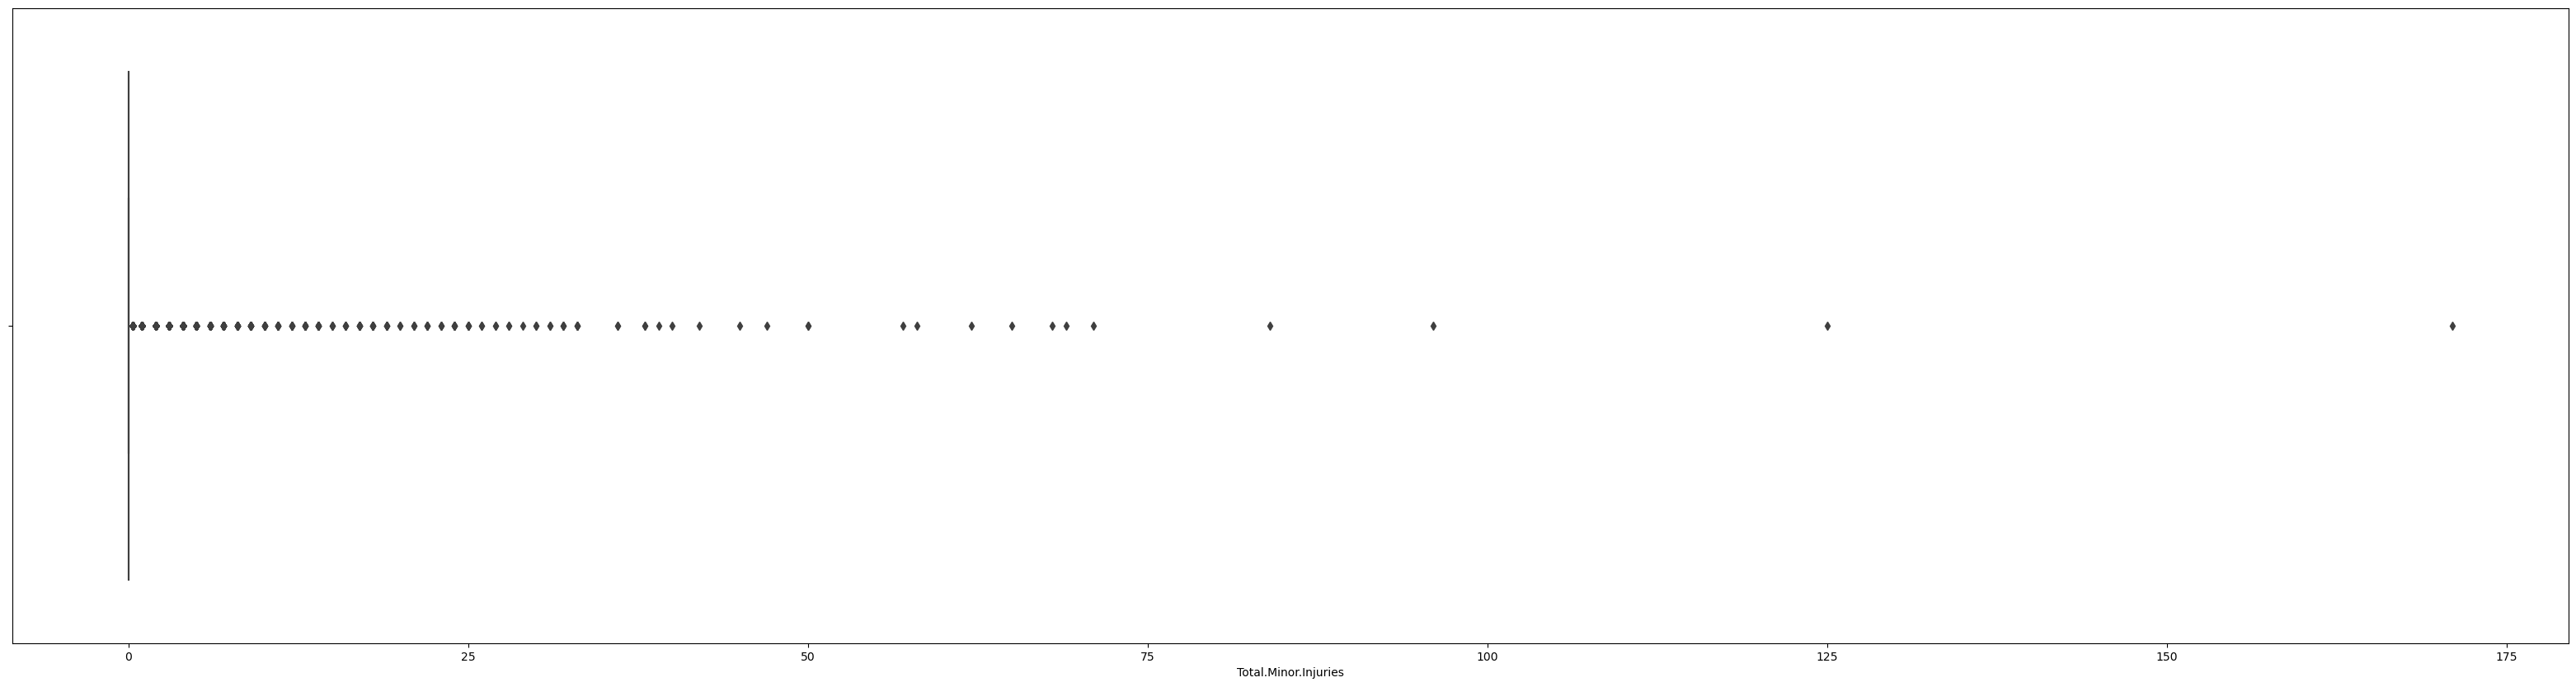

In [82]:
f,axes = plt.subplots(1,1,figsize=(40,10))
sb.boxplot(x='Total.Minor.Injuries',data=data, ax=axes)

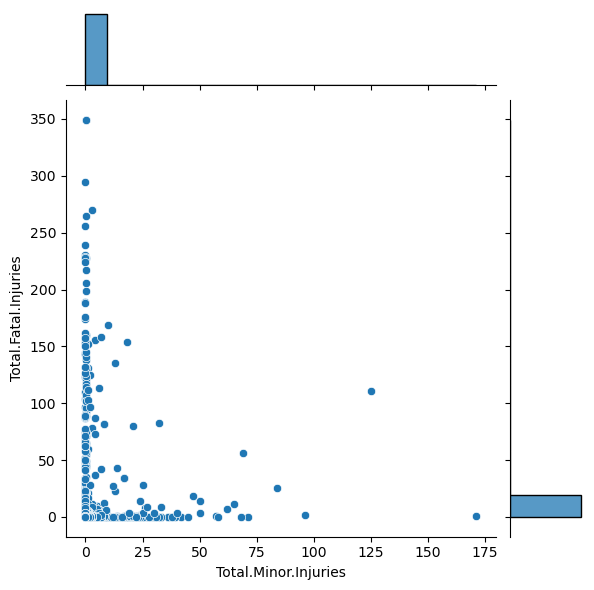

In [83]:
sb.jointplot(x='Total.Minor.Injuries',y='Total.Fatal.Injuries',data=data)

Investigation Type

In [84]:
data['Investigation.Type'].value_counts()

Accident    73895
Incident     2510
Name: Investigation.Type, dtype: int64

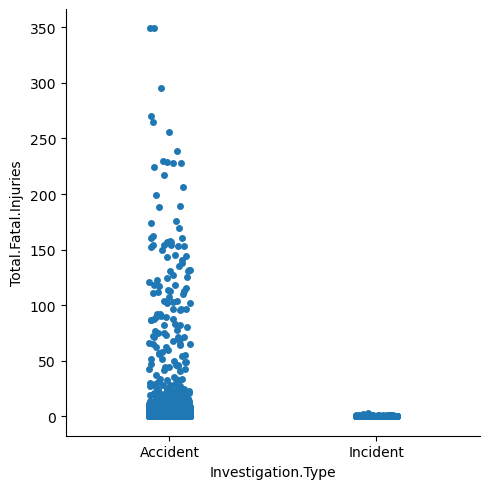

In [85]:
sb.catplot(x='Investigation.Type',y='Total.Fatal.Injuries',data=data)

Aircraft Damage

In [86]:
data['Aircraft.damage'].value_counts()

Substantial    54153
Destroyed      17896
Minor           2091
Unknown           92
Name: Aircraft.damage, dtype: int64

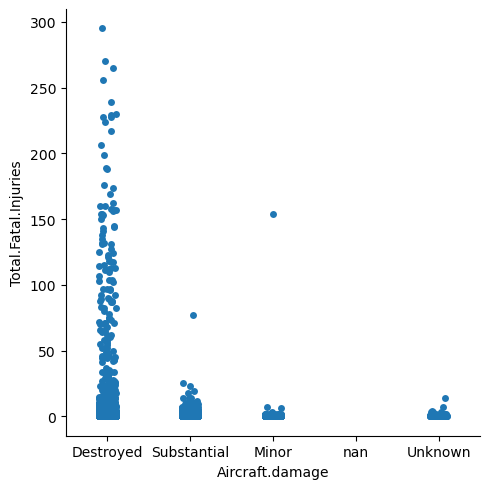

In [87]:
sb.catplot(x='Aircraft.damage',y='Total.Fatal.Injuries',data=data)

Aircraft Category

In [88]:
data['Aircraft.Category'].value_counts()

Unknown              48775
Airplane             23594
Helicopter            2983
Glider                 420
Balloon                192
Weight-Shift           161
Gyrocraft              153
Powered Parachute       91
Ultralight              24
WSFT                     9
Rocket                   1
Blimp                    1
ULTR                     1
Name: Aircraft.Category, dtype: int64

C:\Users\shock\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try stripplot



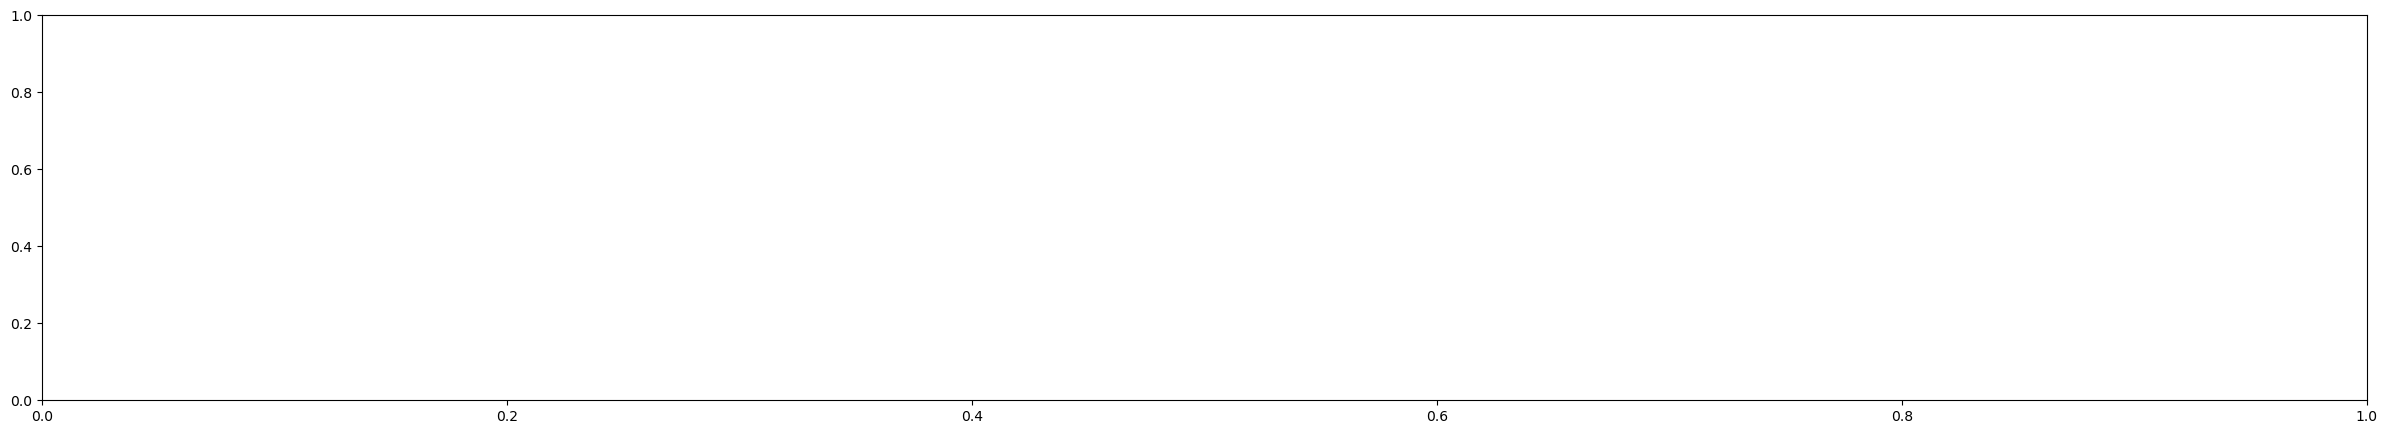

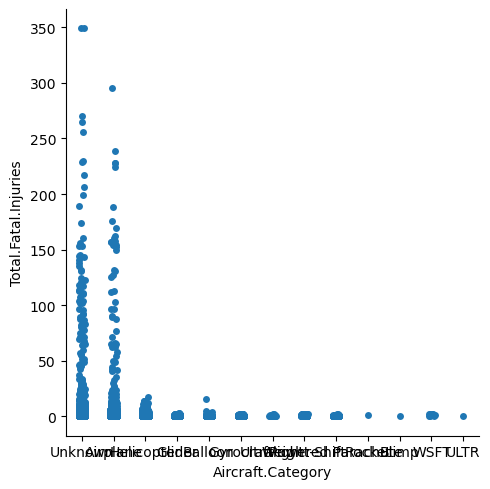

In [89]:
f,axes = plt.subplots(1,1,figsize=(30,5))
sb.catplot(x='Aircraft.Category',y='Total.Fatal.Injuries',data=data,ax=axes)

Engine Type

In [90]:
data['Aircraft.Category'].value_counts()

Unknown              48775
Airplane             23594
Helicopter            2983
Glider                 420
Balloon                192
Weight-Shift           161
Gyrocraft              153
Powered Parachute       91
Ultralight              24
WSFT                     9
Rocket                   1
Blimp                    1
ULTR                     1
Name: Aircraft.Category, dtype: int64

C:\Users\shock\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning:

catplot is a figure-level function and does not accept target axes. You may wish to try stripplot



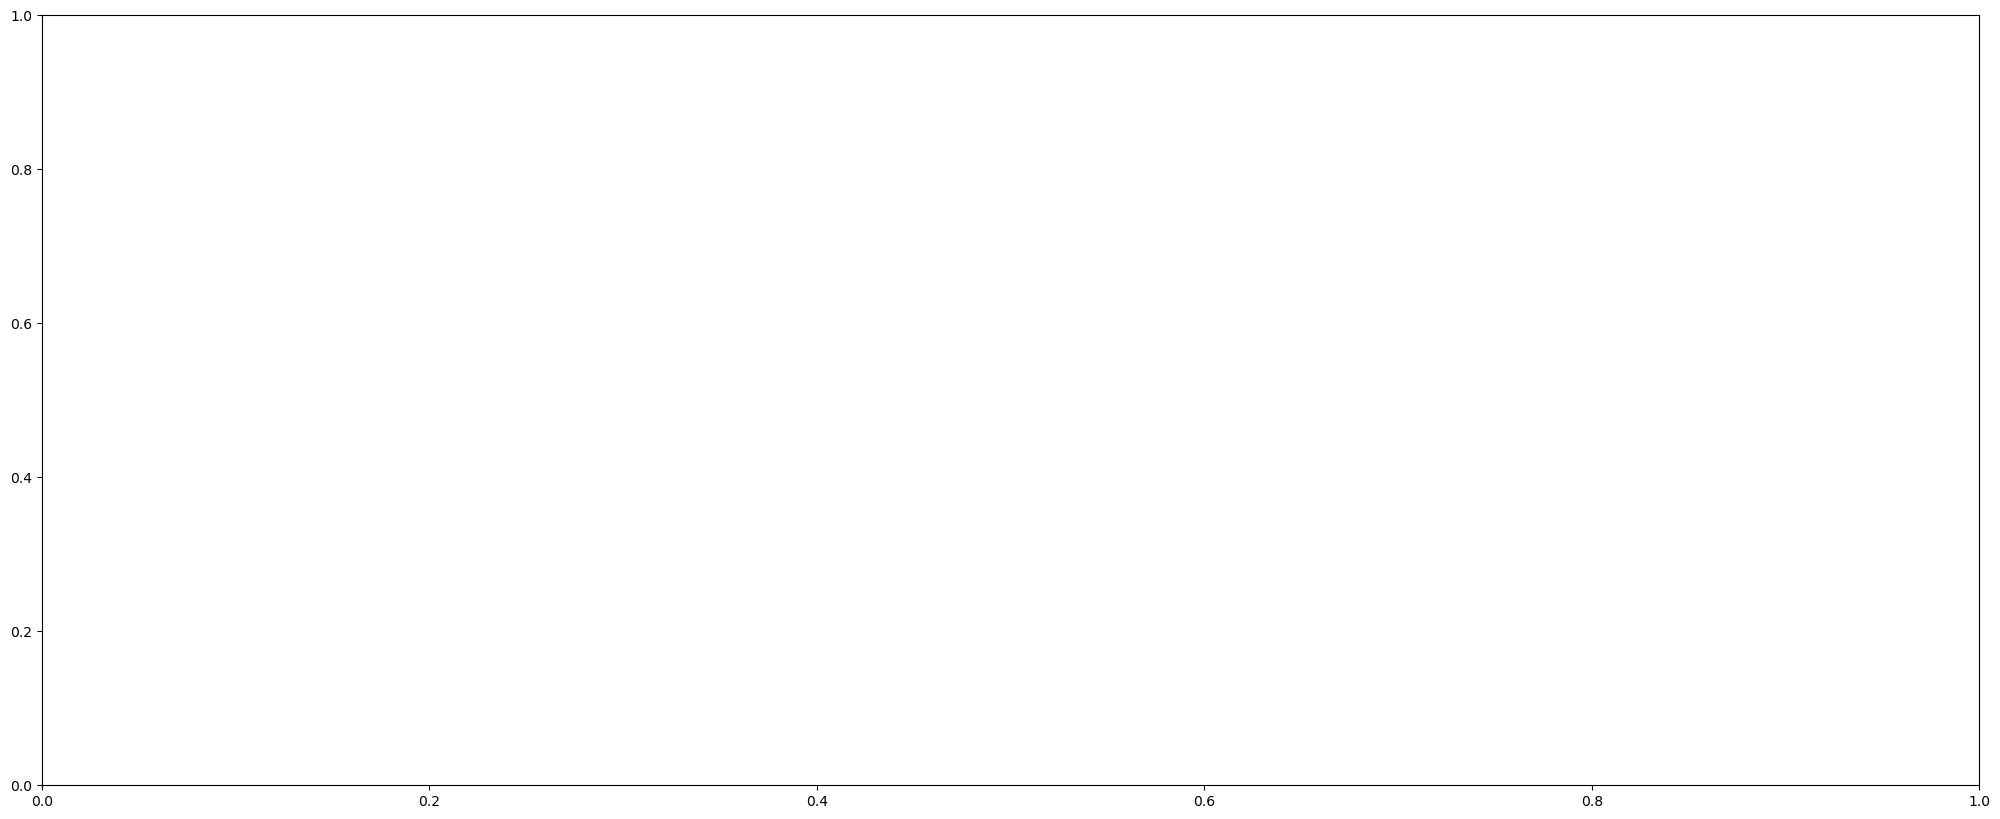

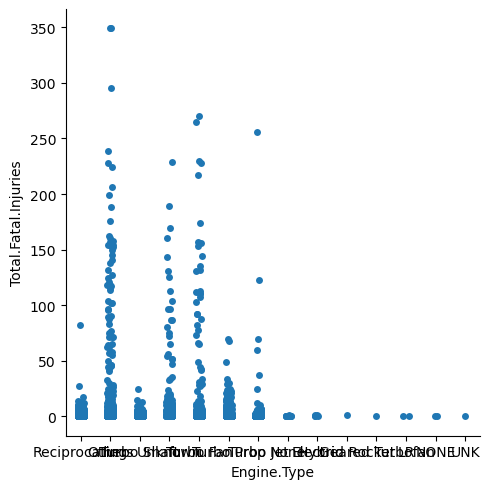

In [91]:
f,axes = plt.subplots(1,1,figsize=(25,10))
sb.catplot(x='Engine.Type',y='Total.Fatal.Injuries',data=data,ax=axes)

C:\Users\shock\AppData\Local\Temp\ipykernel_28300\1693952997.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

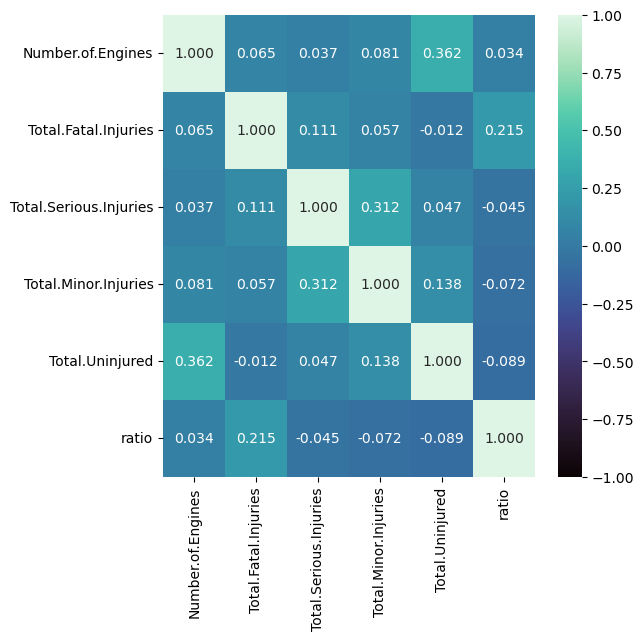

In [92]:
f=plt.figure(figsize=(6,6))
sb.heatmap(data.corr(), vmin=-1, vmax=1, annot= True, fmt=".3f", cmap="mako" )